In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

23
tensor(72.8000, grad_fn=<SumBackward0>)
tensor(1290.5498, grad_fn=<SumBackward0>)
tensor([112.2217]) tensor([6.3304])
loss :tensor(10.1539, grad_fn=<MeanBackward0>)at epoch :0
tensor([42.2868]) tensor([2.3978])
loss :tensor(1.4567, grad_fn=<MeanBackward0>)at epoch :1
tensor([15.9339]) tensor([0.9159])
loss :tensor(0.2217, grad_fn=<MeanBackward0>)at epoch :2
tensor([6.0035]) tensor([0.3575])
loss :tensor(0.0464, grad_fn=<MeanBackward0>)at epoch :3
tensor([2.2616]) tensor([0.1471])
loss :tensor(0.0215, grad_fn=<MeanBackward0>)at epoch :4
tensor([0.8515]) tensor([0.0678])
loss :tensor(0.0179, grad_fn=<MeanBackward0>)at epoch :5
tensor([0.3202]) tensor([0.0379])
loss :tensor(0.0174, grad_fn=<MeanBackward0>)at epoch :6
tensor([0.1199]) tensor([0.0267])
loss :tensor(0.0174, grad_fn=<MeanBackward0>)at epoch :7
tensor([0.0445]) tensor([0.0224])
loss :tensor(0.0173, grad_fn=<MeanBackward0>)at epoch :8
tensor([0.0161]) tensor([0.0208])
loss :tensor(0.0173, grad_fn=<MeanBackward0>)at epoch :9


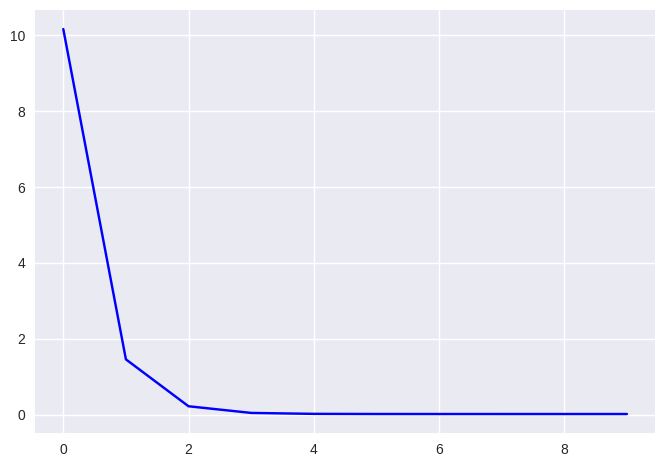

In [5]:
#question 1

import torch
import numpy as np
import matplotlib.pyplot as plt
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
print(len(x))
lr = torch.tensor([0.001])
w = torch.tensor([1.],requires_grad=True)
b = torch.tensor([1.],requires_grad=True)
loss_array = []
epochs = []
y_pred = w*x + b
b_req = (y_pred-y).sum()
print(b_req)
k = ((y_pred-y)*x).sum()
print(k)
for i in range(10):
    y_pred = (w * x) + b
    loss = ((y_pred-y)**2).mean()
    loss_array.append(loss.item())
    loss.backward()
    print(w.grad,b.grad)
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
    w.grad.zero_()
    b.grad.zero_()
    epochs.append(i)
    print('loss :' + str(loss) + 'at epoch :' + str(i))
plt.plot(epochs,loss_array,color = 'blue')
plt.show()

Initial parameters: w=0.4755086302757263, b=0.7380246520042419


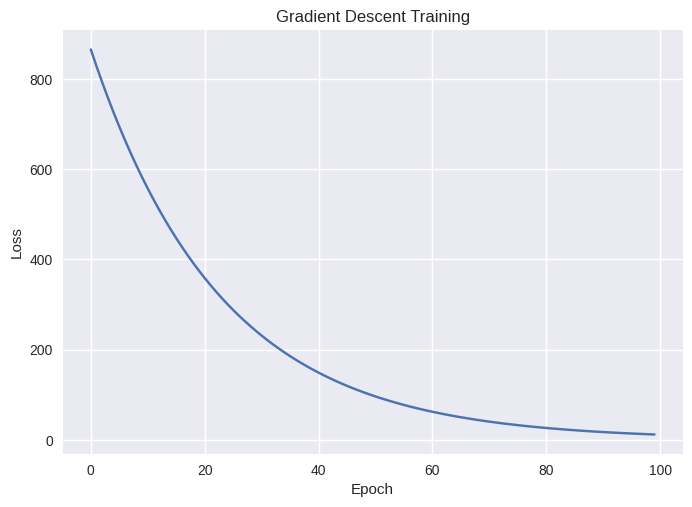

Final parameters: w=8.075176239013672, b=2.9732134342193604


In [6]:
#question 2
import torch
from matplotlib import pyplot as plt

x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

b = torch.rand([1], requires_grad=True)
w = torch.rand([1], requires_grad=True)

print("Initial parameters: w={}, b={}".format(w.item(), b.item()))

learning_rate = 0.001
loss_list = []

for epoch in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_P = a + b
        loss += (y_P - y[j])**2

    loss = loss / len(x)
    loss_list.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()
  

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Gradient Descent Training')
plt.show()

print("Final parameters: w={}, b={}".format(w.item(), b.item()))


Final params are: w=tensor([12.8134], requires_grad=True), b=tensor([2.6936], requires_grad=True), loss=479.5648498535156


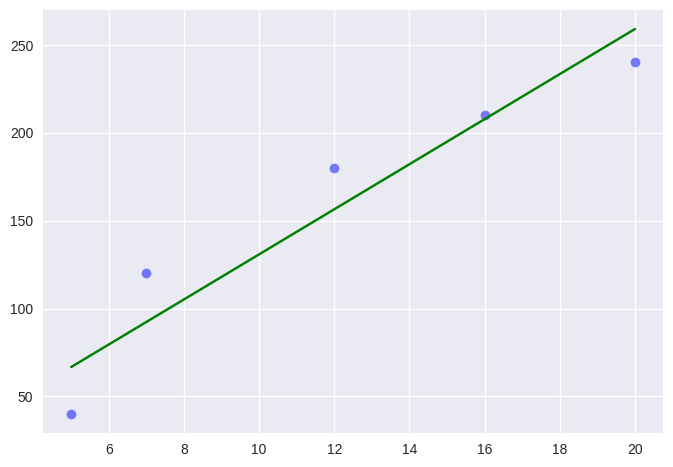

In [7]:
#QUESTION 3

import torch

class CustomLinearRegression:

    def __init__(self, learning_rate=0.001):

        self.w = torch.randn([1]).requires_grad_(True)
        self.b = torch.randn([1]).requires_grad_(True)
        self.lr = learning_rate

    def forward(self, X):
        return self.w * X + self.b

    def update(self):
        with torch.no_grad():
            self.w -= self.lr * self.w.grad
            self.b -= self.lr * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, preds, labels):
        return torch.sum((preds - labels) ** 2) / len(labels)

    def fit(self, X, y, epochs=100):

        losses = []

        for epoch in range(epochs):

            preds = self.forward(X)
            loss = self.criterion(preds, y)
            losses.append(loss.item())

            loss.backward()

            self.update()
            self.reset_grad()

        print(f"Final params are: w={self.w}, b={self.b}, loss={losses[-1]}")
        return self.w.item(), self.b.item()

X = torch.Tensor([5, 7, 12, 16, 20])
y = torch.Tensor([40, 120, 180, 210, 240])

m = CustomLinearRegression()
w, b = m.fit(X, y)
pred = w * X + b

plt.plot(X, y, "bo", alpha=0.5)
plt.plot(X, pred.detach().numpy(), "g-")
plt.show()

In [8]:
X = torch.Tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.Tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [9]:
#QUESTION 4

class LinearRegression(nn.Module):

    def __init__(self, learning_rate=0.001):
        super(LinearRegression, self).__init__()

        self.w = torch.randn([1]).requires_grad_(True)
        self.b = torch.randn([1]).requires_grad_(True)
        
        self.optimizer = torch.optim.SGD([self.w, self.b], lr=learning_rate)
        self.criterion = nn.MSELoss()


    def forward(self, X):
        return self.w * X + self.b

    def fit(self, X, y, num_epochs=1000):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        print(f"Final params are: w={self.w}, b={self.b}, loss={losses[-1]}")
        
        final_preds = (self.w * X + self.b).detach().numpy()
        plt.plot(X, y, "bo", alpha=0.5)
        plt.plot(X, final_preds, "g-")
        plt.show()

Final params are: w=tensor([0.8284], requires_grad=True), b=tensor([0.8397], requires_grad=True), loss=0.014757026918232441


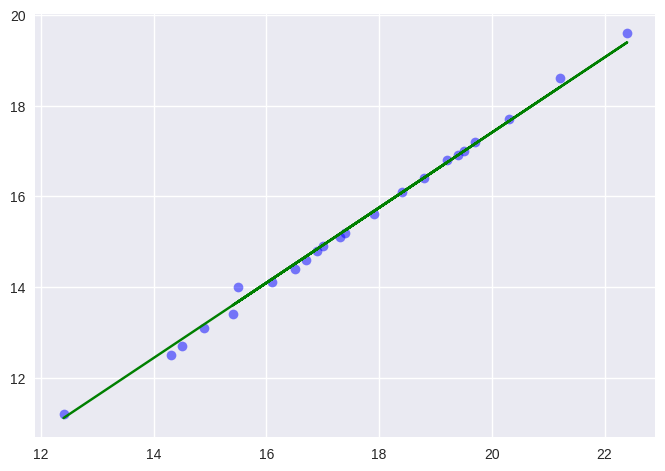

In [10]:
m = LinearRegression()
m.fit(X, y)

linear.weight = tensor([[0.9185]])
linear.bias = tensor([-0.7640])


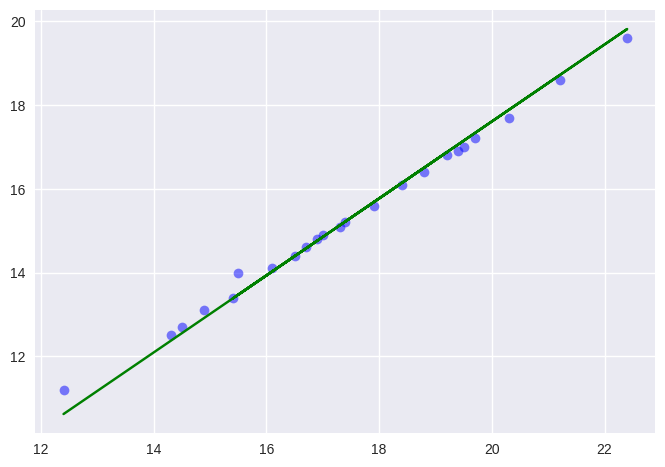

In [12]:
#QUESTION 5
class TrueLinearRegression(nn.Module):

    def __init__(self, input_dims, learning_rate=0.001):

        super(TrueLinearRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

    def forward(self, X):
        return self.linear(X)

    def fit(self, X, y, num_epochs=100, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            final_preds = self(X).detach().numpy()
            plt.plot(X, y, "bo", alpha=0.5)
            plt.plot(X, final_preds, "g-")
            plt.show()

m = TrueLinearRegression(input_dims=1)
m.fit(X.reshape(-1, 1), y.reshape(-1, 1))

In [13]:
#QuESTION 6

X = torch.Tensor([[3, 8], [4, 5], [5, 7], [6, 3], [2, 1]])
y = torch.Tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).reshape(-1, 1)

m = TrueLinearRegression(input_dims=2)
m.fit(X, y, plot=False)

linear.weight = tensor([[ 1.4876, -0.6675]])
linear.bias = tensor([0.4796])


linear.weight = tensor([[0.0964]])
linear.bias = tensor([-3.1111])


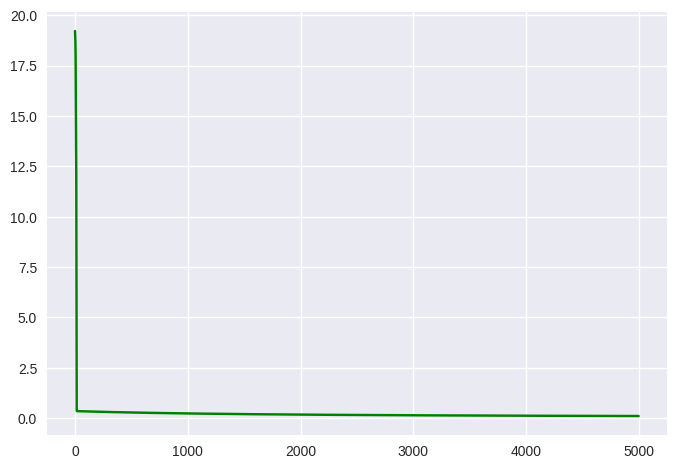

In [14]:
#QUESTION 7

class LogisticRegression(nn.Module):

    def __init__(self, input_dims=1, learning_rate=0.005):

        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)
        self.sigmoid = nn.Sigmoid()

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.BCELoss()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

    def fit(self, X, y, num_epochs=5000, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            plt.plot(range(num_epochs), losses, "g-")
            plt.show()

X = torch.Tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).reshape(-1, 1)
y = torch.Tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

m = LogisticRegression()
m.fit(X, y)

32.257904052734375


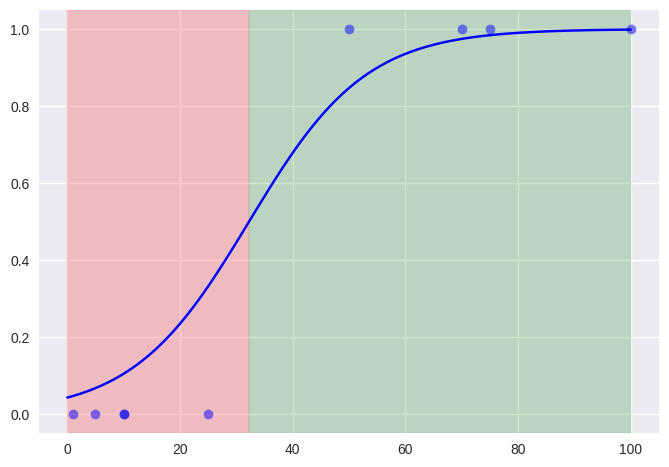

In [15]:
plt.plot(X, y, "bo", alpha=0.5)

params = [x.data for x in list(m.parameters())]
mid_pt = float(- params[1] / params[0])

print(mid_pt)

plt.axvspan(0, mid_pt, alpha=0.2, color='r')
plt.axvspan(mid_pt, 100, alpha=0.2, color='g')

test_X = torch.linspace(0, 100, steps=100).reshape(-1, 1)
plt.plot(test_X, m(test_X).detach().numpy(), "b")

plt.show()